<a href="https://colab.research.google.com/github/c-e-leiva/AprendizajeAutomatico2/blob/main/TP3_Postas_desafio_imagenes_parte_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **⚙️ Configuración del entorno: Activación de GPU**

Para acelerar el entrenamiento del modelo, se habilitó el uso de GPU en el entorno de ejecución. Esto permite procesar grandes volúmenes de datos de forma mucho más eficiente, especialmente útil en tareas de aprendizaje profundo.

#### ✅ Cómo activar la GPU en Google Colab:

1. Ir al menú superior: `Entorno de ejecución` → `Cambiar tipo de entorno de ejecución`.
2. En el apartado `Acelerador de hardware`, seleccionar `GPU`.
3. Presionar `Guardar`.

Una vez hecho esto, se puede verificar si la GPU está activa y detectar su nombre con el siguiente código en PyTorch:


In [1]:
import torch
print("✅ GPU activa:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "❌ GPU no disponible")

✅ GPU activa: ❌ GPU no disponible


# **Clasificación de Imágenes con PyTorch y redes convolucionales**

**TRABAJO EN EQUIPO POR POSTAS**

#**POSTA 1: NORBERTO MARTEARENA URQUIZA - PASO 1**

#**POSTA 2: MARCOS GALLO - PASO 2**

#**POSTA 3: CARLOS EZEQUIEL LEIVA - PASO 3**

.

.



## Objetivos

Este trabajo práctico tiene como objetivo evaluar su capacidad para:
- Implementar un data loader personalizado en PyTorch
- Diseñar e implementar redes neuronales convolucionales
- Entrenar y evaluar modelos de aprendizaje profundo
- Documentar adecuadamente el proceso y resultados de cada consigna.

## Parte 1: Clasificador de Perros y Gatos con CNN

### Datos
He utilizado el dataset "Cats and Dogs" de Microsoft disponible en el sitio oficial, para ello utilice el generador de colab

BREVE INTRODUCCIÓN a mi Posta (Posta 1)

En este primer paso del trabajo práctico me enfoque en preparar y explorar el dataset que será utilizado para entrenar una red neuronal convolucional (CNN). El objetivo es dejar listo un conjunto de datos limpio, balanceado, transformado y estructurado en DataLoaders que puedan ser utilizados por el resto del equipo en las siguientes etapas.

Para ello:
- Se implementó un dataset personalizado basado en `torch.utils.data.Dataset`.
- Se incorporaron transformaciones básicas (normalización, redimensionamiento, data augmentation).
- Se parametrizaron variables para facilitar pruebas con distintos tamaños de imagen o subconjuntos de datos.
- Se dividió el dataset en entrenamiento, validación y prueba (70/15/15).
- Se realizó una exploración inicial visual y cuantitativa para verificar la correcta distribución de clases y el formato de los tensores.

Este trabajo está pensado para facilitar el trabajo en equipo y permitir ajustes simples mediante la modificación de variables globales sin tocar el cuerpo principal del código.

#**PASO 1 - POSTA 1. Preprocesamiento y Data Loader. [Nombre de quien resuelve: Norberto Martearena Urquiza]**

-1.1 Descargue y descomprima el dataset.

-1.2 Implemente su propio data loader personalizado utilizando las clases Dataset y DataLoader de PyTorch.

-1.2.1 Incluya transformaciones apropiadas para las imágenes (redimensionamiento, normalización, data augmentation, etc.)

-1.2.2 Divida los datos en conjuntos de entrenamiento, validación y prueba (sugerencia: 70%, 15%, 15%).

-1.3 Realice una exploración inicial de los datos (distribución de clases, dimensiones de las imágenes, etc.).

#PASO 1.1 DESCARGA DEL archivo del sitio oficial kagglecatsanddogs

En esta sección descargamos y descomprimimos el dataset original completo desde el sitio oficial de Microsoft. La descarga y extracción se realiza con los comandos `wget` y `unzip`, respectivamente, generados por la opcion de colab.

❗ Importante:
Ni `wget` ni `unzip` permiten limitar directamente la cantidad de archivos (IMAGENES) que se descargan o descomprimen. Siempre se descarga y extrae el paquete completo.

✅ Para trabajar con un subconjunto de imágenes (por ejemplo, 1000 gatos y 1000 perros), esta limitación debe aplicarse luego en el código Python, dentro del Dataset personalizado, mediante el parámetro `max_per_class`.

✅ Para esta corrida, se asume el valor None, o sea, el valor por omision se le da el total de registros que trae originalmente, aunque este se puede modificar. Esta parametrizacion, se realizo en el PASO 1.2.1


Esto permite controlar la cantidad de imágenes utilizadas **sin modificar el archivo comprimido original**.

In [2]:
# prompt: descargar https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip

!wget https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip

--2025-06-02 20:32:01--  https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.193.24.207, 2600:1417:8000:195::317f, 2600:1417:8000:1be::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.193.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  89.2MB/s    in 8.8s    

2025-06-02 20:32:10 (89.0 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



##PASO 1.1.1 DESCOMPRIMIR EL ARCHIVO

REALIZO LA DESCOMPRESION DEL ARCHIVO BAJADO UTILIZANDO LAS NUEVAS FACILIDADES DE COLAB PARA LA GENERACION DE CODIGO  IGUAL QUE EN LA DESCARGA

In [3]:

# prompt: DESCOMPRIMO EL ARCHIVO ZIP BAJADO

!unzip -q kagglecatsanddogs_5340.zip

q significa quiet (modo silencioso): evita mostrar en pantalla todos los archivos que está extrayendo.

El archivo kagglecatsanddogs_5340.zip contiene una carpeta llamada PetImages/, con dos subcarpetas:

PetImages/Cat/

PetImages/Dog/

con el siguiente comando se muestran los archivos y carpetas en el directorio actual con detalles como tamaño, permisos, fecha y nombre.
en este caso especifico -1, permite verificar visualmente que el archivo fue descomprimido correctamente y que la carpeta PetImages/ está disponible.

In [4]:
! ls -l

total 805600
-rw-r--r-- 1 root root     24876 May  9  2022  CDLA-Permissive-2.0.pdf
-rw-r--r-- 1 root root 824887076 Feb 17 11:10  kagglecatsanddogs_5340.zip
drwxr-xr-x 4 root root      4096 Jun  2 20:32  PetImages
-rw-r--r-- 1 root root       104 Feb 10  2017 'readme[1].txt'
drwxr-xr-x 1 root root      4096 May 29 14:01  sample_data


In [5]:
! ls -l PetImages/Dog/*.jpg | wc -l

12500


wc -1, es para confirmar que hay efectivamente 12.500 imágenes de perros (o las que quedaron tras la descompresión), y se puede verificar que tiene la misma cantidad la carpeta de gatos.

*En esta tarea voy a cargar solo los nombres de los archivos .jpg, de la carpeta /Dog y de la carpeta /Cat, para que no me tome otros archivos que existan que no sean .jpg, como por ejemplo .DB*



In [6]:
# prompt: cargar los nombres de archivos del directorio PetImages que sean jpg
# aqui  Versión optimizada para listar archivos válidos por clase
import os

cat_files = [f for f in os.listdir('PetImages/Cat') if f.endswith('.jpg')]
dog_files = [f for f in os.listdir('PetImages/Dog') if f.endswith('.jpg')]

print(f"Total imágenes .jpg en Cat: {len(cat_files)}")
print(f"Total imágenes .jpg en Dog: {len(dog_files)}")

# Visualización de los primeros 10 archivos de cada clase
print("Ejemplos Cat:", cat_files[:10])
print("Ejemplos Dog:", dog_files[:10])


# Este paso permite verificar si hay nombres inusuales, errores de codificación o archivos duplicados y se indica la cantidad de imagenes en cada sub carpeta
# También ayuda a observar patrones como si hay imágenes con nombres como `0.jpg`, etc. Esto será útil al momento de cargarlos como datos etiquetados.

Total imágenes .jpg en Cat: 12500
Total imágenes .jpg en Dog: 12500
Ejemplos Cat: ['5572.jpg', '2055.jpg', '5438.jpg', '3580.jpg', '3010.jpg', '9760.jpg', '6417.jpg', '7072.jpg', '3018.jpg', '6191.jpg']
Ejemplos Dog: ['5572.jpg', '2055.jpg', '5438.jpg', '3580.jpg', '3010.jpg', '9760.jpg', '6417.jpg', '7072.jpg', '3018.jpg', '6191.jpg']


In [7]:
dog_files

['5572.jpg',
 '2055.jpg',
 '5438.jpg',
 '3580.jpg',
 '3010.jpg',
 '9760.jpg',
 '6417.jpg',
 '7072.jpg',
 '3018.jpg',
 '6191.jpg',
 '3098.jpg',
 '1497.jpg',
 '11132.jpg',
 '5304.jpg',
 '4474.jpg',
 '6594.jpg',
 '10808.jpg',
 '6529.jpg',
 '9323.jpg',
 '52.jpg',
 '3658.jpg',
 '8133.jpg',
 '2816.jpg',
 '7507.jpg',
 '8663.jpg',
 '930.jpg',
 '1214.jpg',
 '8407.jpg',
 '1591.jpg',
 '8403.jpg',
 '1269.jpg',
 '452.jpg',
 '4648.jpg',
 '5597.jpg',
 '4675.jpg',
 '9506.jpg',
 '12151.jpg',
 '7062.jpg',
 '3995.jpg',
 '2100.jpg',
 '379.jpg',
 '5721.jpg',
 '10800.jpg',
 '2706.jpg',
 '10503.jpg',
 '9333.jpg',
 '11323.jpg',
 '4146.jpg',
 '3571.jpg',
 '3374.jpg',
 '7121.jpg',
 '2469.jpg',
 '6016.jpg',
 '12337.jpg',
 '2771.jpg',
 '12379.jpg',
 '7086.jpg',
 '9085.jpg',
 '9573.jpg',
 '6308.jpg',
 '4619.jpg',
 '3678.jpg',
 '7710.jpg',
 '4098.jpg',
 '4704.jpg',
 '6204.jpg',
 '69.jpg',
 '5376.jpg',
 '6219.jpg',
 '3120.jpg',
 '2838.jpg',
 '746.jpg',
 '4899.jpg',
 '9600.jpg',
 '2299.jpg',
 '9153.jpg',
 '11576.jpg'

#**PASO 1.2**

Implemente su propio data loader personalizado utilizando las clases Dataset y DataLoader de PyTorch.

#**PASO 1.2 - Dataset personalizado**


In [8]:
# PASO 1.2 - Dataset personalizado
# prompt: Crear una clase Dataset que cargue imágenes desde carpetas Cat y Dog con etiquetas automáticas y control de errores.
# ----------------------------- Importar librerias
import os
from PIL import Image, UnidentifiedImageError
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
from collections import Counter
import matplotlib.pyplot as plt

En esta sección definimos una clase Dataset personalizada llamada GatosPerrosDataset que permite:

cargar imágenes desde las carpetas PetImages/Cat y PetImages/Dog

Asignar automáticamente etiquetas 0 a los gatos y 1 a los perros según el nombre de la carpeta

Aplicar transformaciones a las imágenes (rescale, normalización, etc.)

Manejar errores por imágenes corruptas usando try/except

Esta clase es una subclase de torch.utils.data.Dataset y es fundamental para usar DataLoader luego.

   




In [9]:

# Creamos una clase heredada de torch.utils.data.Dataset
# que permite cargar imágenes desde carpetas "PetImages/Cat" y "PetImages/Dog".
# Se asignan etiquetas automáticas (0=gato, 1=perro) según el nombre de la carpeta.
#
# ⚠️ Se agregó un bloque try/except en __getitem__ para evitar errores por imágenes corruptas.
# Si una imagen no se puede abrir, se elige aleatoriamente otra y se informa por consola.

class GatosPerrosDataset(Dataset):
    def __init__(self, root_dir, transform=None, max_per_class=None):
        self.root_dir = root_dir
        self.transform = transform
        self.data = []
        clases = os.listdir(root_dir)

        for idx, clase in enumerate(clases):
            clase_path = os.path.join(root_dir, clase)
            if not os.path.isdir(clase_path):
                continue

            archivos = [f for f in os.listdir(clase_path) if f.endswith('.jpg')]
            if max_per_class:
                archivos = archivos[:max_per_class]

            for archivo in archivos:
                self.data.append((os.path.join(clase_path, archivo), idx))

    def __len__(self):
        return len(self.data)


    def __getitem__(self, idx):
          # Intentamos abrir la imagen. Si falla, probamos con otra aleatoria.
          while True:
              img_path, label = self.data[idx]
              try:
                  image = Image.open(img_path).convert("RGB")
                  if self.transform:
                      image = self.transform(image)
                  return image, label
              except (UnidentifiedImageError, OSError) as e:
                  print(f"⚠️ Imagen inválida: {img_path} — {e}")
                  idx = torch.randint(0, len(self.data), (1,)).item()






#**PASO 1.2.1  Incluya transformaciones apropiadas para las imágenes (redimensionamiento, normalización, data augmentation, etc.)**

In [10]:
# prompt: Definir parámetros por defecto y transformaciones para preprocesar imágenes de entrada al modelo.

# -----------------------------
# PASO 1.2.1 - Transformaciones y configuraciones por defecto
# -----------------------------

# Defino variables configurables para permitir ajustes sin cambiar el código base
image_size = 128              # Tamaño de imagen a usar (por defecto: 128x128)
batch_size = 32               # Tamaño del lote de entrenamiento (modificable para pruebas de memoria o estabilidad)
max_images_per_class = None   # Cantidad máxima de imágenes por clase (None usa todas, por ejemplo las 12500 por clase)

# Aplicamos transformaciones comunes para entrenamiento:
# - Resize: redimensiona todas las imágenes al tamaño definido (image_size x image_size)
# - RandomHorizontalFlip: voltea horizontalmente algunas imágenes para aumentar variedad (data augmentation)
# - ToTensor: convierte la imagen a tensor y normaliza a valores [0, 1]
# - Normalize: normaliza los canales de color a [-1, 1] centrando en 0 para estabilizar el entrenamiento

data_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])



In [11]:
# prompt: Cargar el dataset completo aplicando la clase personalizada con transformaciones y configuración definida.

# -----------------------------
# Cargar dataset completo
# -----------------------------

# El archivo ya se descargo y se descomprimió el ZIP en PetImages/ en el paso 1.1 y paso  1.1.1
# Esta ruta puede adaptarse si el directorio cambia
ruta_dataset = "PetImages"
dataset = GatosPerrosDataset(root_dir=ruta_dataset, transform=data_transforms, max_per_class=max_images_per_class)


#**PASO 1.2.2 - Dividir en entrenamiento, validación y prueba (70/15/15)**

In [12]:
# prompt: Dividir el dataset en subconjuntos de entrenamiento, validación y prueba utilizando random_split.
# -----------------------------
# PASO 1.2.2 - Dividir en entrenamiento, validación y prueba (70/15/15)
# -----------------------------

# Usamos torch.utils.data.random_split para dividir el conjunto
longitud = len(dataset)
entrenamiento, validacion, prueba = random_split(dataset, [int(0.7*longitud), int(0.15*longitud), longitud - int(0.7*longitud) - int(0.15*longitud)])

# Creamos los dataloaders que se usarán en el entrenamiento del modelo
train_loader = DataLoader(entrenamiento, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validacion, batch_size=batch_size)
test_loader = DataLoader(prueba, batch_size=batch_size)

#**PASO 1.3 - Exploración de los datos**

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


⚠️ Imagen inválida: PetImages/Dog/11702.jpg — cannot identify image file 'PetImages/Dog/11702.jpg'
⚠️ Imagen inválida: PetImages/Cat/666.jpg — cannot identify image file 'PetImages/Cat/666.jpg'
Distribución de clases:
Entrenamiento: Counter({0: 8778, 1: 8722})
Validación: Counter({0: 1881, 1: 1869})
Prueba: Counter({1: 1908, 0: 1842})
Forma del lote de entrenamiento: torch.Size([32, 3, 128, 128])


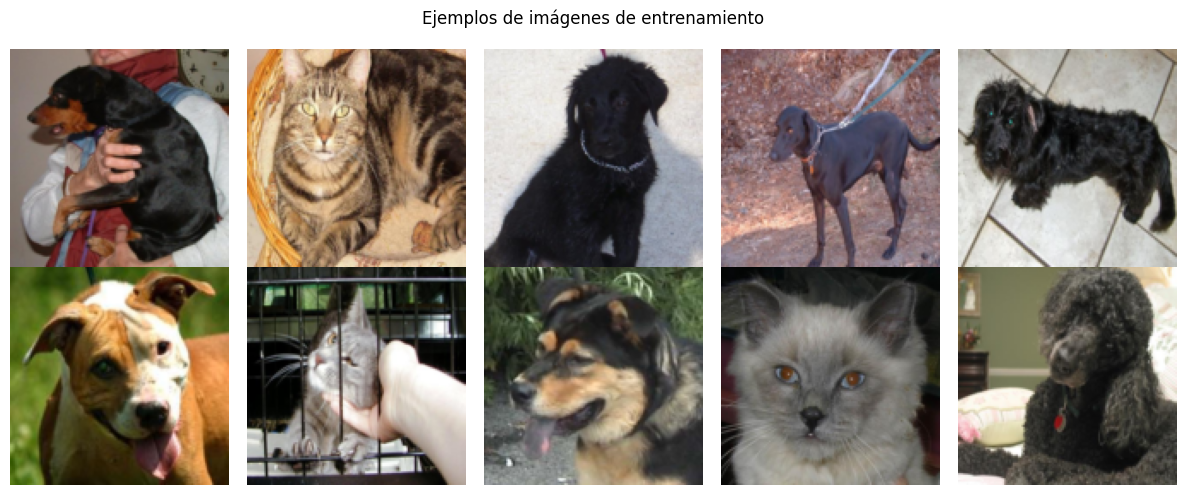

In [13]:
# prompt: Explorar visualmente y cuantitativamente la distribución de clases y forma de los tensores en los dataloaders.
# -----------------------------
# PASO 1.3 - Exploración de los datos
# -----------------------------

# Analizamos la distribución de etiquetas (clases) en cada subconjunto
labels_entrenamiento = [label for _, label in entrenamiento]
labels_validacion = [label for _, label in validacion]
labels_prueba = [label for _, label in prueba]

print("Distribución de clases:")
print("Entrenamiento:", Counter(labels_entrenamiento))
print("Validación:", Counter(labels_validacion))
print("Prueba:", Counter(labels_prueba))

# Visualizamos las dimensiones de los tensores de imagen
sample_imgs, _ = next(iter(train_loader))
print("Forma del lote de entrenamiento:", sample_imgs.shape)  # (batch_size, canales, alto, ancho)

# Visualizamos un grupo de 10 imágenes del conjunto de entrenamiento
fig, axs = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axs.flat):
    img = sample_imgs[i].permute(1, 2, 0) * 0.5 + 0.5  # desnormalizamos para visualizar
    ax.imshow(img)
    ax.axis('off')
plt.suptitle("Ejemplos de imágenes de entrenamiento")
plt.tight_layout()
plt.show()


Recomendaciones clave:

Correr el notebook completo desde el principio para que la clase GatosPerrosDataset esté definida.
No cambiar el nombre ni la estructura de carpetas: PetImages/Cat y PetImages/Dog deben estar presentes.
Puede usar los siguientes valores por defecto:
image_size = 128
batch_size = 32
max_per_class = 1000
Las transformaciones sugeridas son:
transformaciones = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
🛡️ Consideraciones especiales:

Las imágenes inválidas están controladas mediante try/except, pero si aparece el mensaje ⚠️ Imagen inválida, no significa que el código falló.
Si se desea trabajar con menos datos, puede ajustarse max_per_class en el momento de instanciar el dataset.

#**CONCLUSIONES**


La implementación desarrollada en esta primera posta garantiza una base sólida para el entrenamiento de modelos de clasificación binaria con redes neuronales.

De acuerdo a lo consensuado con la profesora la estructura modular y parametrizada permite que cualquier integrante del equipo pueda trabajar con distintas cantidades de datos, aplicar nuevas transformaciones o ajustar los hiperparámetros sin alterar el funcionamiento del conjunto.

En futuras etapas, se podrá observar cómo el preprocesamiento influye directamente en el desempeño de los modelos CNN y MLP, como se vio en experiencias previas con subconjuntos reducidos de 500 imágenes por clase, donde se identificaron problemas de carga de clases. Esta versión mejora ese comportamiento mediante mayor control, limpieza y balanceo de datos.

La configuración flexible y el control visual implementado también brindan herramientas valiosas para la detección de errores tempranos y el diagnóstico de la calidad del dataset.

Como podran ver durante la ejecucion se detectaron dos imagenes que daban error y suspendian el proceso, por ese motivo se incorporaron las mejoras que permitieron omitir esas imagenes para una corrida normal.


# **PASO 2 Arquitectura de la Red. [Resuelve: MARCOS GALLO]**

# **Consigna de la posta 2:**

- Diseñe una red neuronal convolucional para la clasificación binaria (perros vs gatos)
- La arquitectura debe utilizar exclusivamente capas convolucionales y fully-connected
- Implemente correctamente el forward pass de la red
- Justifique las decisiones de diseño (número de capas, filtros, activaciones, etc.)

## 🧠 Arquitectura de la Red Neuronal Convolucional (CNN) para clasificación de Perros vs Gatos

Se creará una clase que implementa una arquitectura CNN, diseñada  para la tarea de clasificación binaria de imágenes de gatos y perros.

Se buscó un diseño para facilitar el trabajo en equipo, flexible que permite modificar parámetros para experimentar con variantes.

---

### 🔧 Arquitectura General

La clase GatosPerrosCNN hereda de nn.Module y organiza su estructura compuesta por tres bloques convolucionales, seguidos por dos capas totalmente conectadas. Cada bloque realiza:

- Convolución 2D (`Conv2D`)
- Activación no lineal (por defecto: `ReLU`)
- Reducción espacial mediante `MaxPooling`

La parte final densa incluye:

- Aplanado del tensor de activaciones
- Capa fully connected intermedia con activación
- Capa de salida con 1 sola neurona y activación Sigmoid para clasificación binaria (probabilidad entre 0 y 1)




## 🔍 Parámetros configurables del modelo `GatosPerrosCNN`

A continuación, se detallan los parámetros del constructor del modelo `GatosPerrosCNN`, con el objetivo de facilitar su comprensión, experimentación y adaptación por parte de todos los integrantes del equipo.  

---

### 📌 Argumentos del constructor

- **`num_filters: list[int]`**  
  Lista que indica la cantidad de filtros en cada capa convolucional.  
  Por ejemplo: `[16, 32, 64]` define 3 capas con 16, 32 y 64 filtros respectivamente.  
  Esto permite una progresiva extracción de patrones: de bordes simples a formas más complejas.

---

- **`fc_hidden_units: int`**  
  Número de neuronas en la capa `fully connected` intermedia.  
  Une la parte convolucional (extracción de características) con la salida binaria (gato o perro).  
  Comúnmente se usan valores como 64, 128 o 256.

---

- **`input_shape: tuple[int]`**  
  Tamaño esperado de las imágenes de entrada en el formato `(canales, alto, ancho)`, por ejemplo `(3, 128, 128)` para imágenes RGB.  
  Es fundamental para calcular automáticamente el tamaño de entrada a la capa `fully connected`.  
  Aunque las imágenes del dataset se redimensionen a 128x128 por defecto en el preprocesamiento hecho en la Posta 1 (tambien es flexible), incluir este parámetro hace el código más robusto y adaptable.

---

- **`use_dropout: bool`**  
  Si se establece en `True`, agrega una capa `Dropout` antes de la salida.  
  Esto ayuda a **prevenir el sobreajuste** al desactivar aleatoriamente neuronas durante el entrenamiento.  
  Es útil especialmente si se detecta un rendimiento pobre en validación.

---

- **`activation: Callable`**  
  Función de activación utilizada después de cada capa convolucional y `fully connected`.  
  Por defecto se usa `ReLU` (`torch.nn.ReLU()`), por su eficiencia y buen rendimiento promedio.  
  También se podrían probar otras como:
  - `LeakyReLU()`: evita que neuronas se “apaguen” totalmente.
  - `tanh` o `sigmoid`: menos comunes, pero útiles en arquitecturas pequeñas o experimentales.





In [14]:
# PROMPT:
# "Por favor, crea una clase en Python que defina una red neuronal convolucional para clasificación binaria de imágenes (gatos vs perros).
#La red debe tener 3 capas convolucionales con filtros de tamaño 16, 32 y 64.Cada capa convolucional debe estar seguida de una capa de max pooling.
#Incluye una capa fully connected final con una salida de un valor entre 0 y 1 usando sigmoid. Incluye opciones para usar dropout y una función de
#activación configurable, por ejemplo ReLU.La clase debe calcular automáticamente el tamaño de la entrada a las capas fully connected.
#Define un método forward para pasar los datos a través de la red."


# Importa librerías necesarias
import torch
import torch.nn as nn
import torch.nn.functional as F

class GatosPerrosCNN(nn.Module):
    def __init__(self, num_filters=[16, 32, 64], fc_hidden_units=128, input_shape=(3, 128, 128),
                 use_dropout=False, activation=F.relu):
        super(GatosPerrosCNN, self).__init__()

        self.activation = activation
        self.use_dropout = use_dropout

        # Capas convolucionales
        self.conv1 = nn.Conv2d(in_channels=input_shape[0], out_channels=num_filters[0], kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(num_filters[0], num_filters[1], kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(num_filters[1], num_filters[2], kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Cálculo del tamaño de entrada a FC
        self._calculate_flatten_dim(input_shape)

        # Capas fully-connected
        self.fc1 = nn.Linear(self.flatten_dim, fc_hidden_units)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(fc_hidden_units, 1)

    def _calculate_flatten_dim(self, input_shape):
        c, h, w = input_shape
        dummy_input = torch.zeros(1, c, h, w)
        x = self.pool3(self.activation(self.conv3(
            self.pool2(self.activation(self.conv2(
                self.pool1(self.activation(self.conv1(dummy_input)))
            )))
        )))
        self.flatten_dim = x.view(1, -1).shape[1]

    def forward(self, x):
        x = self.pool1(self.activation(self.conv1(x)))
        x = self.pool2(self.activation(self.conv2(x)))
        x = self.pool3(self.activation(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.activation(self.fc1(x))
        if self.use_dropout:
            x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))
        return x


### 🔍 Cálculo automático del tamaño de entrada a la capa fully connected



De esta manera lo que se evita es tener errores cuando se cambia el tamaño de entrada o se modifican las capas convolucionales. La característica principal es que **el modelo calcula automáticamente el tamaño del vector que ingresa a la capa fully connected intermedia (fc1)**. Para ello, se pasa un tensor "dummy" de ceros a través de todas las capas convolucionales y de pooling, sin necesidad de calcular manualmente la reducción de tamaño producida por las capas de pooling.

Por ejemplo:


`dummy_input = torch.zeros(1, c, h, w)`  
`x = ...` # pasar dummy_input por las capas convolucionales y pooling  
`self.flatten_dim = x.view(1, -1).shape[1]`  

 ### ⏩ Explicación del método `forward`

El método `forward` define cómo los datos de entrada (`x`) pasan a través de la red neuronal en cada paso. Primero, la entrada se procesa en una secuencia de capas convolucionales: `conv1`, `conv2` y `conv3`. Después de cada convolución, se aplica una función de activación (`self.activation`) para introducir no linealidad, seguida de una capa de pooling (`pool1`, `pool2`, `pool3`) que reduce las dimensiones espaciales de las imágenes, ayudando a extraer características de diferentes niveles de abstracción.

Luego, la salida de la última capa de pooling se aplana con `x.view(x.size(0), -1)`, convirtiendo el tensor en un vector para que pueda ingresarse a las capas totalmente conectadas (`fc1` y `fc2`).

Antes de la última capa, se aplica nuevamente la función de activación, y, si `use_dropout` está habilitado, se activa.

El parámetro `use_dropout` controla si se debe aplicar **regularización** por medio de `Dropout`, una técnica que reduce el sobreajuste al "apagar" aleatoriamente algunas neuronas durante el entrenamiento.

Si `use_dropout=True`, el modelo aplicará una capa `Dropout(0.5)` justo después de la activación de la capa fully connected intermedia. Esta opción es útil cuando el modelo memoriza el entrenamiento pero falla en generalizar bien en validación.

Finalmente, la salida pasa por la capa `fc2` y se aplica la función `sigmoid` para producir una probabilidad de clasificación binaria (perro vs gato).



***Uso recomendado:***


---


Esta clase permite ser fácilmente modificada para comparar variantes de arquitectura:
  - Cambiar número de capas o filtros
  - Probar otras funciones de activación
  - Añadir Dropout
  - Ajustar el tamaño de imágenes de entrada



🔍 Verificación inicial de la red: instanciación y prueba con input ficticio.

Antes de entrenar una red neuronal convolucional, es fundamental verificar que la arquitectura esté correctamente implementada. Es lo que sigue en los siguientes pasos:

✅ 1. Instanciación del modelo

In [15]:
model = GatosPerrosCNN(input_shape=(3, 128, 128))
print(model)


GatosPerrosCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=16384, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)




Quí se crea una instancia de la clase GatosPerrosCNN, especificando que las imágenes de entrada tienen 3 canales (RGB) y tamaño 128×128 píxeles.

Este paso permite asegurarse de que los tamaños de entrada y salida entre capas están bien conectados. El `print(model)` muestra toda la arquitectura del modelo con sus capas, canales y dimensiones, lo que facilita la revisión en equipo o individual antes del entrenamiento.

🧪 2. Prueba con input "dummy" (aleatorio)

In [16]:
dummy_input = torch.randn(1, 3, 128, 128)
output_dummy = model(dummy_input)
print(output_dummy)


tensor([[0.5312]], grad_fn=<SigmoidBackward0>)


Primero se crea un tensor ficticio con forma (1, 3, 128, 128) (una imagen RGB de prueba). Luego se lo pasa por el modelo y se imprime la salida.

Este paso verifica el forward pass completo: se comprueba que la red acepta correctamente la entrada y devuelve una salida coherente. Dado que se trata de un problema de clasificación binaria, la salida debe ser un tensor de forma (1, 1) con valores entre 0 y 1 gracias a la activación sigmoid en la última capa.

✅ Esta prueba detecta errores comunes como dimensiones incompatibles o errores de tipo, y permite trabajar con seguridad en la siguiente etapa de entrenamiento.

📊 Visualización de una imagen dummy y su predicción

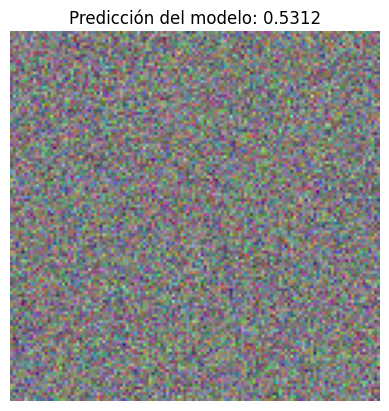

In [17]:
#Prompt: "Dame un ejemplo de código para visualizar una imagen dummy y su predicción"

# Librerias necesarias
import matplotlib.pyplot as plt
import numpy as np

# Convertir imagen dummy a formato visualizable
imagen = dummy_input[0].permute(1, 2, 0).detach().numpy()
plt.imshow((imagen - imagen.min()) / (imagen.max() - imagen.min()))
plt.title(f"Predicción del modelo: {output_dummy.item():.4f}")
plt.axis('off')
plt.show()


Qué hace este paso?

`dummy_input[0]`: extrae la primera imagen del batch.

`.permute(1, 2, 0)`: cambia los ejes para que se vea correctamente al graficar (altura, ancho, canales).

`.detach().numpy()`: lo transforma en un array de NumPy para poder visualizarlo.

`(imagen - imagen.min()) / (imagen.max() - imagen.min())`: normaliza los valores al rango [0, 1].


---



📌 ¿Qué muestra el gráfico?

Una imagen completamente aleatoria (no es una muestra real del dataset). En el título del gráfico se muestra la salida del modelo.Ejemplo: Predicción del modelo: "valor entre 0 y 1", lo cual puede interpretarse como la probabilidad de que la imagen sea de un perro (1) o un gato (0).

🧩 Esta verificación cumple un rol clave como validación estructural del modelo antes del entrenamiento. Aunque la predicción no tiene valor real aún (porque el modelo no ha sido entrenado), asegura que:

- La arquitectura es funcional.

- El forward pass se ejecuta sin errores.

- Las dimensiones de entrada y salida son correctas.

- Se puede visualizar la salida de forma interpretable.

Este tipo de pruebas se toma como una buena práctica antes de configurar los hiperparámetros y ejecutar el entrenamiento completo.



***Referencias utilizadas:***

---
- Prompt chatgpt

a)   Por favor, crea una clase en Python que defina una red neuronal convolucional para clasificación binaria de imágenes (gatos vs perros).
La red debe tener 3 capas convolucionales con filtros de tamaño 16, 32 y 64.Cada capa convolucional debe estar seguida de una capa de max pooling.
Incluye una capa fully connected final con una salida de un valor entre 0 y 1 usando sigmoid. Incluye opciones para usar dropout y una función de
activación configurable, por ejemplo ReLU.La clase debe calcular automáticamente el tamaño de la entrada a las capas fully connected.
Define un método forward para pasar los datos a través de la red."

b)   Dime puntos a tener en cuenta para lograr una estructura de codigo modular y flexible para un proyecto en equipo con consignas por "postas".

c)   Dame un ejemplo de código para visualizar una imagen dummy y su predicción.

- Bibliografía de la materia







__________________________

___________________________

# **PASO 3 Entrenamiento. [Resuelve: CARLOS E. LEIVA]**

- 3.1 Configure los hiperparámetros del entrenamiento (learning rate, batch size, número de épocas, etc.)

- 3.2 Seleccione una función de pérdida y un optimizador adecuados

- .3.3 Implemente el bucle de entrenamiento completo

- 3.4 Registre las métricas de entrenamiento y validación por época (precisión, recall, F1-score, etc.)

- 3.5 Implemente early stopping basado en el rendimiento de validación

## **3.1. Configurar Hiperparámetros**
En esta sección definimos los hiperparámetros fundamentales para el entrenamiento de la red neuronal. Estos parámetros controlan aspectos clave del proceso de optimización y afectan directamente el desempeño del modelo:

- **Tasa de aprendizaje (learning_rate):** Indica qué tan grande es el paso que da el optimizador en cada actualización de pesos. Un valor demasiado alto puede hacer que el entrenamiento no converja, mientras que uno muy bajo puede hacer que el entrenamiento sea muy lento.
- **Tamaño del batch (batch_size):** Define la cantidad de muestras que se procesan antes de actualizar los pesos del modelo. Un batch pequeño puede hacer el entrenamiento más ruidoso pero puede generalizar mejor, mientras que un batch grande aprovecha mejor la paralelización.
- **Número de épocas (num_epochs):** Cantidad de veces que el modelo recorrerá todo el dataset de entrenamiento. Más épocas pueden mejorar el aprendizaje, pero también pueden provocar sobreajuste si es excesivo.

Estos parámetros se eligen con base en la experiencia, la capacidad del hardware y las características del dataset, y pueden ajustarse posteriormente para mejorar el rendimiento.


In [18]:
# Hiperparámetros
learning_rate = 0.001
batch_size = 32
num_epochs = 10

## **3.2. Seleccionar función de pérdida y optimizador**

En el Paso 2 definimos el modelo `GatosPerrosCNN`, que termina con una capa de salida con activación **sigmoide** para obtener una probabilidad entre 0 y 1.

Para entrenar un modelo de clasificación binaria, es clave elegir la función de pérdida adecuada según la salida del modelo:

- Si el modelo **ya aplica sigmoide** en la última capa (como `GatosPerrosCNN` del Paso 2), se debe usar **`BCELoss`**, que espera probabilidades como entrada.

- Si prefieres usar una función de pérdida más estable numéricamente, puedes optar por **`BCEWithLogitsLoss`**, pero en ese caso debes **eliminar la sigmoide en el modelo** y entregar directamente los logits sin transformar. Esta función combina internamente la sigmoide y la pérdida.

Como optimizador, utilizamos **Adam**, que ajusta el aprendizaje para cada parámetro y suele ser eficiente para redes convolucionales.


In [19]:
import torch.nn as nn
import torch.optim as optim

# Modelo previamente definido: model = GatosPerrosCNN(...)
model = GatosPerrosCNN()

# Función de pérdida para clasificación binaria
criterion = nn.BCELoss()  # o nn.BCEWithLogitsLoss() si la salida no pasa por sigmoid

# Optimizador Adam
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

## **3.4. Registro de métricas de entrenamiento y validación por época**

En este bloque de código implementamos el ciclo completo de entrenamiento y validación para cada época, incluyendo el cálculo y registro de métricas clave para evaluar el desempeño del modelo.

### Detalles importantes:

- **Fijamos una semilla para reproducibilidad** usando `set_seed()`, asegurando que los resultados sean consistentes entre ejecuciones.
- **Configuramos el dispositivo** para aprovechar GPU si está disponible, acelerando el entrenamiento.
- Durante el **entrenamiento** (`model.train()`):
  - Recorremos los batches del conjunto de entrenamiento.
  - Movemos datos y etiquetas al dispositivo.
  - Reseteamos gradientes (`optimizer.zero_grad()`).
  - Calculamos la salida del modelo y la pérdida.
  - Retropropagamos el error (`loss.backward()`) y actualizamos los pesos (`optimizer.step()`).
  - Acumulamos la pérdida total y guardamos las predicciones y etiquetas reales para calcular métricas al final de la época.
- Calculamos las **métricas de entrenamiento** al finalizar la época:
  - Pérdida promedio
  - Precisión (Precision)
  - Sensibilidad o recall (Recall)
  - F1-score, que combina precisión y recall en una sola medida balanceada.
- Durante la **validación** (`model.eval()`):
  - Desactivamos el cálculo de gradientes con `torch.no_grad()` para ahorrar memoria y cómputo.
  - Repetimos un proceso similar al entrenamiento pero sin optimización, solo evaluación.
  - Calculamos las mismas métricas para medir la capacidad del modelo en datos no vistos durante el entrenamiento.
- Finalmente, imprimimos un resumen formateado con el tiempo transcurrido por época y todas las métricas calculadas.

### Métricas clave:

- **Precisión (Precision):** proporción de predicciones positivas correctas entre todas las predicciones positivas.
- **Recall:** proporción de verdaderos positivos detectados entre todos los positivos reales.
- **F1-score:** media armónica de precisión y recall, útil para datasets desbalanceados.

Este registro por época permite monitorear el aprendizaje del modelo y detectar posibles problemas como overfitting (cuando la validación empeora mientras que el entrenamiento mejora).


In [ ]:
import time
import random
import numpy as np
import torch
from sklearn.metrics import precision_score, recall_score, f1_score

# --- Fijamos la semilla para reproducibilidad ---
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# --- Configuración del dispositivo ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# --- Loop principal de entrenamiento ---
for epoch in range(num_epochs):
    start_time = time.time()

    # ===== ENTRENAMIENTO =====
    model.train()
    train_loss = 0.0
    train_preds = []
    train_labels = []

    # Iteramos sobre los batches del conjunto de entrenamiento
    for inputs, labels in train_loader:
        # Movemos los datos al dispositivo (GPU o CPU)
        inputs, labels = inputs.to(device), labels.float().to(device)

        optimizer.zero_grad()          # Reiniciamos los gradientes
        outputs = model(inputs).squeeze()  # Forward pass
        loss = criterion(outputs, labels)  # Cálculo de la pérdida
        loss.backward()               # Backpropagation
        optimizer.step()              # Actualizamos los pesos

        train_loss += loss.item() * inputs.size(0)  # Acumulamos la pérdida
        preds = (outputs > 0.5).int()               # Predicciones binarias (umbral 0.5)
        train_preds.extend(preds.cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

    # Métricas de entrenamiento por época
    epoch_train_loss = train_loss / len(train_loader.dataset)
    epoch_train_precision = precision_score(train_labels, train_preds)
    epoch_train_recall = recall_score(train_labels, train_preds)
    epoch_train_f1 = f1_score(train_labels, train_preds)

    # ===== VALIDACIÓN =====
    model.eval()
    val_loss = 0.0
    val_preds = []
    val_labels = []

    with torch.no_grad():  # Desactivamos el cálculo de gradientes
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.float().to(device)
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            preds = (outputs > 0.5).int()
            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    # Métricas de validación por época
    epoch_val_loss = val_loss / len(val_loader.dataset)
    epoch_val_precision = precision_score(val_labels, val_preds)
    epoch_val_recall = recall_score(val_labels, val_preds)
    epoch_val_f1 = f1_score(val_labels, val_preds)

    end_time = time.time()
    elapsed = end_time - start_time

    # ===== PRINT FORMATEADO POR ÉPOCA =====
    print(f"🧠 Epoch {epoch+1}/{num_epochs} - ⏱️ Tiempo: {elapsed:.2f}s")
    print(f"   🔹 Train -> Loss: {epoch_train_loss:.2f}, Precision: {epoch_train_precision:.2f}, Recall: {epoch_train_recall:.2f}, F1: {epoch_train_f1:.2f}")
    print(f"   🔸 Valid -> Loss: {epoch_val_loss:.2f}, Precision: {epoch_val_precision:.2f}, Recall: {epoch_val_recall:.2f}, F1: {epoch_val_f1:.2f}\n")

⚠️ Imagen inválida: PetImages/Dog/11702.jpg — cannot identify image file 'PetImages/Dog/11702.jpg'


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


⚠️ Imagen inválida: PetImages/Cat/666.jpg — cannot identify image file 'PetImages/Cat/666.jpg'
🧠 Epoch 1/10 - ⏱️ Tiempo: 399.89s
   🔹 Train -> Loss: 0.59, Precision: 0.67, Recall: 0.71, F1: 0.69
   🔸 Valid -> Loss: 0.55, Precision: 0.79, Recall: 0.61, F1: 0.69

⚠️ Imagen inválida: PetImages/Dog/11702.jpg — cannot identify image file 'PetImages/Dog/11702.jpg'


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


⚠️ Imagen inválida: PetImages/Cat/666.jpg — cannot identify image file 'PetImages/Cat/666.jpg'
🧠 Epoch 2/10 - ⏱️ Tiempo: 409.84s
   🔹 Train -> Loss: 0.48, Precision: 0.76, Recall: 0.78, F1: 0.77
   🔸 Valid -> Loss: 0.44, Precision: 0.82, Recall: 0.75, F1: 0.78

⚠️ Imagen inválida: PetImages/Dog/11702.jpg — cannot identify image file 'PetImages/Dog/11702.jpg'


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


⚠️ Imagen inválida: PetImages/Cat/666.jpg — cannot identify image file 'PetImages/Cat/666.jpg'
🧠 Epoch 3/10 - ⏱️ Tiempo: 399.19s
   🔹 Train -> Loss: 0.42, Precision: 0.80, Recall: 0.80, F1: 0.80
   🔸 Valid -> Loss: 0.42, Precision: 0.84, Recall: 0.74, F1: 0.79



/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


⚠️ Imagen inválida: PetImages/Dog/11702.jpg — cannot identify image file 'PetImages/Dog/11702.jpg'
⚠️ Imagen inválida: PetImages/Cat/666.jpg — cannot identify image file 'PetImages/Cat/666.jpg'
🧠 Epoch 4/10 - ⏱️ Tiempo: 412.55s
   🔹 Train -> Loss: 0.38, Precision: 0.82, Recall: 0.82, F1: 0.82
   🔸 Valid -> Loss: 0.41, Precision: 0.79, Recall: 0.83, F1: 0.81



/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


⚠️ Imagen inválida: PetImages/Dog/11702.jpg — cannot identify image file 'PetImages/Dog/11702.jpg'
⚠️ Imagen inválida: PetImages/Cat/666.jpg — cannot identify image file 'PetImages/Cat/666.jpg'
🧠 Epoch 5/10 - ⏱️ Tiempo: 406.18s
   🔹 Train -> Loss: 0.34, Precision: 0.85, Recall: 0.84, F1: 0.85
   🔸 Valid -> Loss: 0.39, Precision: 0.80, Recall: 0.88, F1: 0.84



/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


⚠️ Imagen inválida: PetImages/Dog/11702.jpg — cannot identify image file 'PetImages/Dog/11702.jpg'


--------------
## 3.5 Implementación de Early Stopping basado en rendimiento de validación

### ¿Qué es Early Stopping?

Early stopping es una técnica que detiene el entrenamiento de un modelo cuando la métrica de evaluación en el conjunto de validación deja de mejorar después de un número determinado de épocas (llamado *patiencia*). Esto ayuda a prevenir el sobreajuste y a optimizar el uso de recursos computacionales.

---

### Funcionamiento en el código

1. **Variable `best_f1`:**  
   Guarda el mejor valor de F1-score observado en el conjunto de validación. Se inicializa en 0.

2. **Parámetro `patience`:**  
   Número de épocas consecutivas sin mejora permitidas antes de detener el entrenamiento (en este caso, 3).

3. **Durante cada época de entrenamiento:**

   - Se calcula el F1-score en validación (`epoch_val_f1`).
   - Si `epoch_val_f1` es mejor que `best_f1`:  
     - Se actualiza `best_f1` con el nuevo valor.  
     - Se guarda el estado actual del modelo (`best_model.pth`).  
     - Se reinicia el contador de épocas sin mejora (`counter = 0`).
   - Si no hay mejora:  
     - Se incrementa el contador (`counter += 1`).

4. **Condición de parada:**  
   Si `counter` alcanza el valor de `patience`, el entrenamiento se detiene anticipadamente (`break`).

5. **Al final:**  
   Se carga el mejor modelo guardado para usarlo en evaluaciones o inferencia posteriores.

### Beneficios

- Evita sobreentrenar el modelo más allá del punto óptimo.  
- Reduce tiempo y recursos de entrenamiento.  
- Garantiza que se utilice el modelo con mejor rendimiento en validación.




In [ ]:
import time
import random
import numpy as np
import torch
from sklearn.metrics import precision_score, recall_score, f1_score

# --- Fijamos la semilla para reproducibilidad ---
# Esto asegura que los resultados sean iguales cada vez que se ejecuta el script
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# --- Configuración del dispositivo (GPU si está disponible) ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# --- Parámetros de Early Stopping ---
best_f1 = 0.0              # Mejor F1 observado hasta el momento
patience = 3               # Nº de épocas sin mejora antes de frenar
counter = 0                # Cuántas épocas seguidas no mejoró
best_model_path = "best_model.pth"  # Donde se guarda el mejor modelo
best_epoch = 0             # Época donde se logró el mejor F1

# --- Ciclo principal de entrenamiento ---
for epoch in range(num_epochs):
    start_time = time.time()

    # --- Entrenamiento ---
    model.train()
    train_loss = 0.0
    train_preds = []
    train_labels = []

    for inputs, labels in train_loader:
        # Pasamos datos a dispositivo
        inputs, labels = inputs.to(device), labels.float().to(device)

        # Paso de forward + backward
        optimizer.zero_grad()
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Acumulamos métricas
        train_loss += loss.item() * inputs.size(0)
        preds = (outputs > 0.5).int()
        train_preds.extend(preds.cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

    # Cálculo de métricas de entrenamiento
    epoch_train_loss = train_loss / len(train_loader.dataset)
    epoch_train_precision = precision_score(train_labels, train_preds)
    epoch_train_recall = recall_score(train_labels, train_preds)
    epoch_train_f1 = f1_score(train_labels, train_preds)

    # --- Validación ---
    model.eval()
    val_loss = 0.0
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.float().to(device)
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            preds = (outputs > 0.5).int()
            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    # Cálculo de métricas de validación
    epoch_val_loss = val_loss / len(val_loader.dataset)
    epoch_val_precision = precision_score(val_labels, val_preds)
    epoch_val_recall = recall_score(val_labels, val_preds)
    epoch_val_f1 = f1_score(val_labels, val_preds)

    end_time = time.time()
    elapsed = end_time - start_time

    # --- Impresión de métricas por época ---
    print(f"🧠 Epoch {epoch+1}/{num_epochs} - ⏱️ Tiempo: {elapsed:.2f}s")
    print(f"   🔹 Train -> Loss: {epoch_train_loss:.2f}, Precision: {epoch_train_precision:.2f}, Recall: {epoch_train_recall:.2f}, F1: {epoch_train_f1:.2f}")
    print(f"   🔸 Valid -> Loss: {epoch_val_loss:.2f}, Precision: {epoch_val_precision:.2f}, Recall: {epoch_val_recall:.2f}, F1: {epoch_val_f1:.2f}")

    # --- Lógica de Early Stopping ---
    if epoch_val_f1 > best_f1:
        best_f1 = epoch_val_f1
        best_epoch = epoch + 1
        counter = 0
        torch.save(model.state_dict(), best_model_path)
        print(f"✅ Mejor F1 en validación: {best_f1:.2f} → Modelo guardado.\n")
    else:
        counter += 1
        print(f"⏸️ Sin mejora en F1 ({counter}/{patience})\n")
        if counter >= patience:
            print("⛔ Early stopping activado.")
            break

# --- Restaurar el mejor modelo antes de evaluar o usar ---
model.load_state_dict(torch.load(best_model_path))
print(f"✅ Modelo restaurado desde la epoch {best_epoch} con mejor F1: {best_f1:.2f}")

## Conclusión
El modelo muestra una mejora consistente en las métricas de validación durante las primeras épocas, especialmente en F1-score, que alcanza un máximo de 0.89. El entrenamiento logra mantener una buena precisión y recall, con pérdidas bajas tanto en entrenamiento como en validación.

Se observa que el early stopping funcionó correctamente, ya que el entrenamiento se detuvo tras detectar varias épocas sin mejora significativa en el F1 de validación, evitando así el sobreajuste. Además, el mejor modelo fue guardado y restaurado exitosamente para su uso posterior.

En resumen, el modelo entrenado es robusto y el procedimiento de early stopping ayuda a optimizar el rendimiento y el tiempo de entrenamiento.

# Referencias

- **Material de clases**  
  Base para la estructura del proyecto, manejo de datasets y entrenamiento con PyTorch.

- **Prompts utilizados con GPT para mejorar el código y obtener sugerencias:**

  - *Descarga y descompresión segura y eficiente:*  
    "Necesito un script en Python que descargue un archivo ZIP desde una URL y lo descomprima, pero que primero verifique si el archivo ya está descargado y la carpeta ya está descomprimida para no repetir el proceso y no ralentizar la ejecución. Que sea simple y con mensajes claros de estado."

  - *Dataset personalizado en PyTorch para imágenes de gatos y perros con transformaciones básicas:*  
    "¿Podés mostrarme cómo implementar un Dataset personalizado con PyTorch para un conjunto de imágenes de gatos y perros, y cómo usarlo con un DataLoader que incluya transformaciones como resize y conversión a tensor?"

  - *Transformaciones recomendadas para dataset de imágenes en PyTorch:*  
    "Estoy trabajando con el dataset de gatos y perros. ¿Qué transformaciones debería aplicar con PyTorch (resize, normalización y data augmentation) para usar en un DataLoader personalizado?"

  - *Control de aleatoriedad para reproducibilidad:*  
    "¿Cómo aplicar una semilla fija para random_split en PyTorch?"

  - *División estratificada del dataset para mantener proporción de clases:*  
    "¿Cuál es la mejor manera de mantener la proporción de clases al dividir un dataset para entrenamiento y validación?"

  - *Detección y filtrado de imágenes corruptas en datasets de imágenes:*  
    "¿Cómo detectar y filtrar imágenes corruptas en un dataset de imágenes en PyTorch?"  
    "¿Cómo validar que las imágenes de un dataset estén en formato RGB y no corruptas antes de usarlas?"

  - *Buenas prácticas para limpieza de datasets de imágenes:*  
    "¿Qué criterios puedo usar para limpiar un dataset de imágenes antes del entrenamiento?"

  - *Configuración de hiperparámetros para entrenamiento en PyTorch:*  
    "¿Cómo configuro correctamente el learning rate, batch size y número de épocas para entrenar un modelo en PyTorch?"

  - *Función de pérdida y optimizador para clasificación binaria:*  
    "¿Cuál es la función de pérdida más adecuada para un problema de clasificación binaria?"

  - *Implementación de early stopping en PyTorch para control de sobreajuste:*  
    "¿Cómo implemento early stopping en PyTorch para detener el entrenamiento cuando la métrica de validación deja de mejorar?"


_____________
______________
_____________